In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("actores_tomas.csv", sep=";")
data = data.set_index("toma")

In [3]:
data

,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0
4,1,1,0,0,0,0,1,1,0,0
5,0,1,0,1,0,0,0,1,0,0
6,1,1,0,1,1,0,0,0,0,0
7,1,1,0,1,1,0,0,0,0,0
8,1,1,0,0,0,1,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0


## Solución aleatoria
Observemos los posibles costos de realizar soluciones aleatorias.
Cada solución consistirá en agrupar 6 tomas en 5 días diferentes. (cada día tendrá 6 tomas)
y sumar el costo que tendría cada actor en cada día

In [4]:
indices_aleatorios = list(range(30))
# random.seed(23)
random.shuffle(indices_aleatorios)
print(indices_aleatorios)

[24, 5, 27, 0, 12, 4, 10, 2, 22, 15, 3, 18, 16, 8, 26, 29, 17, 23, 6, 9, 28, 19, 7, 25, 13, 11, 14, 21, 1, 20]


In [5]:
indices_dias = [indices_aleatorios[i*6:i*6+6] for i in range(5)]

In [6]:
indices_dias

[[24, 5, 27, 0, 12, 4],
 [10, 2, 22, 15, 3, 18],
 [16, 8, 26, 29, 17, 23],
 [6, 9, 28, 19, 7, 25],
 [13, 11, 14, 21, 1, 20]]

### Ejemplo de la solución
Acá podrá observar que en cada día se colocaron 6 tomas aleatorias. 
Así se verá por ejemplo el primer día

In [7]:
data.iloc[indices_dias[0]]

,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
25,1,1,0,1,0,0,0,0,0,1
6,1,1,0,1,1,0,0,0,0,0
28,1,0,0,1,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0
13,1,0,0,1,1,0,0,0,0,0
5,0,1,0,1,0,0,0,1,0,0


In [8]:
# evaluación de una solución
data.iloc[indices_dias[0]].max().sum()

7

In [9]:
 def evaluar_dia(tomas_dia):
    # tomas_dia debe ser un vector con los índices de las tomas que se incluirán en un día
    return data.iloc[tomas_dia].max().sum()

def evaluar_solucion(solucion):
    # solucion debe ser una lista de listas. De tal forma que cada fila contenga los índices
    # de las tomas que corresponden a un día de grabación
    costo = 0
    for indices_dia in solucion:
        costo += evaluar_dia(indices_dia)
    return costo

In [10]:
for i, indices_dia  in enumerate(indices_dias):
    print("#"*50)
    print(f"dia: {i+1}")
    costo_dia = evaluar_dia(indices_dia)
    print("costo día:", costo_dia)
    display(data.iloc[indices_dia])
    print()
    print()

##################################################
dia: 1
costo día: 7


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
25,1,1,0,1,0,0,0,0,0,1
6,1,1,0,1,1,0,0,0,0,0
28,1,0,0,1,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0
13,1,0,0,1,1,0,0,0,0,0
5,0,1,0,1,0,0,0,1,0,0




##################################################
dia: 2
costo día: 8


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
11,1,1,1,0,1,0,0,1,0,0
3,0,1,0,0,1,0,1,0,0,0
23,1,0,1,0,0,0,0,0,0,0
16,0,0,0,1,0,0,0,0,0,1
4,1,1,0,0,0,0,1,1,0,0
19,1,0,1,0,0,0,0,0,0,0




##################################################
dia: 3
costo día: 6


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
17,1,0,1,0,0,0,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0
27,0,0,0,1,1,0,0,0,0,0
30,1,0,0,1,0,0,0,0,0,0
18,0,0,1,0,0,1,0,0,0,0
24,0,0,1,0,0,1,0,0,0,0




##################################################
dia: 4
costo día: 7


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
7,1,1,0,1,1,0,0,0,0,0
10,1,1,0,0,0,1,0,0,1,0
29,1,0,0,0,1,1,0,0,0,0
20,1,0,1,1,1,0,0,0,0,0
8,1,1,0,0,0,1,0,0,0,0
26,1,0,1,0,1,0,0,0,1,0




##################################################
dia: 5
costo día: 8


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
14,1,0,1,0,0,1,0,0,0,0
12,1,1,1,1,0,1,0,0,0,0
15,1,1,0,0,0,0,1,0,0,0
22,1,1,1,1,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0
21,0,0,0,0,0,1,0,1,0,0


In [11]:
# el costo de la solución anterior es:
evaluar_solucion(indices_dias)

36

## Solución por K-means

In [12]:
from sklearn.cluster import KMeans

In [13]:
X = np.array(data)
X

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0,

In [14]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

(array([8., 0., 5., 0., 0., 4., 0., 8., 0., 5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

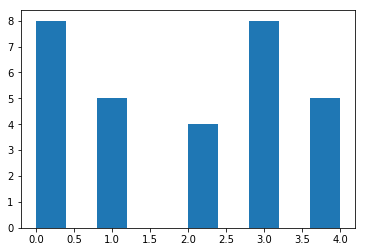

In [15]:
plt.hist(kmeans.labels_)

In [16]:
kmeans.cluster_centers_

array([[ 6.25000000e-01, -5.55111512e-17,  2.50000000e-01,
         8.75000000e-01,  6.25000000e-01,  1.25000000e-01,
         1.38777878e-17,  0.00000000e+00,  0.00000000e+00,
         1.25000000e-01],
       [ 8.00000000e-01,  1.00000000e+00, -5.55111512e-17,
         0.00000000e+00,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  2.00000000e-01,  2.00000000e-01,
         0.00000000e+00],
       [ 2.50000000e-01,  0.00000000e+00,  7.50000000e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 8.75000000e-01,  1.00000000e+00,  3.75000000e-01,
         1.00000000e+00,  3.75000000e-01,  1.25000000e-01,
         1.38777878e-17,  1.25000000e-01,  0.00000000e+00,
         1.25000000e-01],
       [ 1.00000000e+00,  2.00000000e-01,  1.00000000e+00,
         0.00000000e+00,  4.00000000e-01,  0.00000000e+00,
         0.00000000e+00,  2.00000000e-01,  2.00000000e-01,
         0.

In [17]:
import math
math.factorial(30)
def combinatoria(n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [18]:
print(combinatoria(30, 6))
print(combinatoria(24, 6))
print(combinatoria(18, 6))
print(combinatoria(12, 6))
print(combinatoria(6, 6))

593775.0
134596.0
18564.0
924.0
1.0


## Solución por técnica voraz

In [19]:
import itertools 

In [20]:
tomas_disponibles = set(range(30))
subsets_optimos = []

In [21]:
def get_subsets_optimos(tomas_disponibles):
    stuff = tomas_disponibles
    costo_min = np.inf
    best_subset = []
    
    # parámetros para imprimir
    total_combinaciones = combinatoria(len(tomas_disponibles), 6)
    imprimir_cada = max(total_combinaciones//20, 1)
    for i, subset in enumerate(itertools.combinations(tomas_disponibles, 6)):
        if (i+1) % imprimir_cada == 0:
            print(f"Iteración # {i+1}/{'{:.0f}'.format(total_combinaciones)} ({'{:.2f}'.format((i+1)/total_combinaciones*100)}%)")
        costo_actual = evaluar_dia(list(subset))
        if costo_actual < costo_min:
            costo_min = costo_actual
            best_subset = subset
            print(f"iteración: {i}, costo: {costo_min}, combinación: {best_subset}")
    
    return best_subset

In [22]:
for i in range(5):
    print("#" * 50)
    print(f"hay {len(tomas_disponibles)} disponibles")
    print()
    best_subset = get_subsets_optimos(tomas_disponibles)
    
    # actualizo los disponibles
    tomas_disponibles = tomas_disponibles - set(best_subset)
    subsets_optimos.append(list(best_subset))
    print()

##################################################
hay 30 disponibles

iteración: 0, costo: 7, combinación: (0, 1, 2, 3, 4, 5)
iteración: 626, costo: 6, combinación: (0, 1, 2, 5, 6, 8)
iteración: 7850, costo: 5, combinación: (0, 1, 5, 6, 8, 12)


KeyboardInterrupt: 

In [154]:
subsets_optimos

[[13, 16, 17, 18, 22, 23],
 [1, 12, 19, 26, 27, 29],
 [0, 2, 5, 6, 8, 14],
 [3, 4, 7, 11, 20, 21],
 [9, 10, 15, 24, 25, 28]]

In [153]:
evaluar_solucion(subsets_optimos)

29

In [156]:
for i, indices_dia  in enumerate(subsets_optimos):
    print("#"*50)
    print(f"dia: {i+1}")
    costo_dia = evaluar_dia(indices_dia)
    print("costo día:", costo_dia)
    display(data.iloc[indices_dia])
    print()
    print()

##################################################
dia: 1
costo día: 3


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
14,1,0,1,0,0,1,0,0,0,0
17,1,0,1,0,0,0,0,0,0,0
18,0,0,1,0,0,1,0,0,0,0
19,1,0,1,0,0,0,0,0,0,0
23,1,0,1,0,0,0,0,0,0,0
24,0,0,1,0,0,1,0,0,0,0




##################################################
dia: 2
costo día: 4


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
2,0,0,1,1,1,0,0,0,0,0
13,1,0,0,1,1,0,0,0,0,0
20,1,0,1,1,1,0,0,0,0,0
27,0,0,0,1,1,0,0,0,0,0
28,1,0,0,1,0,0,0,0,0,0
30,1,0,0,1,0,0,0,0,0,0




##################################################
dia: 3
costo día: 6


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0
6,1,1,0,1,1,0,0,0,0,0
7,1,1,0,1,1,0,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0
15,1,1,0,0,0,0,1,0,0,0




##################################################
dia: 4
costo día: 7


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
4,1,1,0,0,0,0,1,1,0,0
5,0,1,0,1,0,0,0,1,0,0
8,1,1,0,0,0,1,0,0,0,0
12,1,1,1,1,0,1,0,0,0,0
21,0,0,0,0,0,1,0,1,0,0
22,1,1,1,1,0,0,0,0,0,0




##################################################
dia: 5
costo día: 9


,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
toma,,,,,,,,,,
10,1,1,0,0,0,1,0,0,1,0
11,1,1,1,0,1,0,0,1,0,0
16,0,0,0,1,0,0,0,0,0,1
25,1,1,0,1,0,0,0,0,0,1
26,1,0,1,0,1,0,0,0,1,0
29,1,0,0,0,1,1,0,0,0,0


## Aproximación por algoritmos genéticos

In [41]:
n = 6
ind1 =np.random.choice(range(n), n, replace=False)#(random.sample(range(n), n))
ind2 =np.random.choice(range(n), n, replace=False)#np.array(random.sample(range(n), n))
print(np.where(ind1==ind2))

(array([2], dtype=int64),)


In [42]:
def get_child(ind1, ind2):
    n = len(ind1)
    available_items = set(range(n))
    available_indices = set(range(n))
    ch = np.zeros(n)

    common_indexes = np.where(ind1==ind2)[0] # el [0] es para usar solo una dimensión

    ch[common_indexes] = ind1[common_indexes]

    # actualización de los índices y los items disponibles
    available_indices = available_indices - set(common_indexes)
    available_items = available_items - set(ch[common_indexes])

    dict_cruce = {
        0: ind1,
        1: ind2
    }
    for i, index in enumerate(available_indices):
        elem = dict_cruce.get(i%2)[index]
        if not elem in available_items:
            elem = random.choice(list(available_items))
        available_items.remove(elem)
        ch[index] = elem
    return ch

def cruzar_elementos(ind1, ind2):
    ch1 = get_child(ind1, ind2)
    ch2 = get_child(ind2, ind1)
    return ch1, ch2
    
    

In [49]:
n = 30
ind1 =np.random.choice(range(n), n, replace=False)#(random.sample(range(n), n))
ind2 =np.random.choice(range(n), n, replace=False)#np.array(random.sample(range(n), n))
print(np.where(ind1==ind2))

ch1, ch2 = cruzar_elementos(ind1, ind2)
print(ind1)
print(ind2)
print(ch1)
print(ch2)

(array([ 8, 27], dtype=int64),)
[22 19  9 25 17 13  7 27  3 15  2  8 23  4  5 20  0 16 14 29 18 26 24 21
 10  6 11 12  1 28]
[ 7 26 27  8 13  2 24  5  3  6  9 25 22 21  4 29 15 20  1 19 16  0 10 18
 11 28 23 12 17 14]
[22. 26.  9.  8. 17.  2.  7.  5.  3. 15. 25. 19. 13.  4. 21. 20. 27. 16.
  1. 29. 24. 18. 10.  6. 11.  0. 23. 12. 14. 28.]
[ 7. 19. 27. 25. 13. 22. 24.  8.  3.  6.  2.  4. 23. 21.  5. 29.  0. 20.
 14. 17. 18.  1.  9. 28. 10. 15. 11. 12. 16. 26.]


In [494]:
# functión para evaluar a un individuo
def evaluar_individuo(ind):
    sol = ind.reshape(5, 6)
    return evaluar_solucion(sol)

In [495]:
# función para crear una población
def crear_poblacion(n):
    # esta función retornará un arreglo con n vectores
    # donde cada vector representa una solución al problema
    population = [np.random.choice(range(30), 30, replace=False) for i in range(n)]
    return population

In [496]:
# función para evaluar toda una población
def evaluar_poblacion(population):
    scores = [evaluar_individuo(x) for x in population]
    return scores

In [497]:
def seleccion_individuos(scores_df, n_best, n_worst):
    # esta función retornará los indices de los mejores,
    # y los índices de los peores indivividuos
    best_indices = list(scores_df.iloc[:n_best]["indice"])
    worst_indices = list(scores_df.iloc[-n_worst:]["indice"])
    return best_indices, worst_indices

In [507]:
n = 20000
poblacion= crear_poblacion(n)

In [508]:
n_best = 2000
# n_worst = 8000

for i in range(500):
    print("iteración", i)
    print(f"evaluando a la población de: {len(poblacion)} individuos")
    scores = evaluar_poblacion(poblacion)

    # crear dataframe que guarde los índices de los individuos y las poblaciones
    scores_df = pd.DataFrame(scores)
    scores_df.reset_index(inplace=True)
    scores_df.columns = ["indice", "score"]
    scores_df = scores_df.sort_values(by="score").reset_index(drop=True)
    print(scores_df.head())
    print(scores_df["score"].describe())
    
    n_worst = len(poblacion)+16000 - n
    print("total a eliminar", n_worst)
    best_indices, worst_indices = seleccion_individuos(scores_df, n_best, n_worst)
    best_indiv = [poblacion[x] for x in best_indices]
    worst_indiv = [poblacion[x] for x in worst_indices]
    print("best_indiv", best_indiv[0])
    
    print("cruzando los mejores")
    new_kids = cruzar_mejores_4(best_indiv, list(1/scores_df[:n_best]["score"]), 8000)#cruzar_mejores_3(best_indiv, 4000)
    old_pop = [poblacion[x] for x in range(len(poblacion)) if x not in worst_indices]
    poblacion = old_pop + new_kids
    
    print()
#     poblacion += crear_poblacion(n-len(poblacion))

iteración 0
evaluando a la población de: 20000 individuos
   indice  score
0   18273     31
1    4928     33
2   11256     33
3   16410     33
4     472     33
count    20000.000000
mean        38.168050
std          1.332441
min         31.000000
25%         37.000000
50%         38.000000
75%         39.000000
max         41.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [22  9 13 17  7 18 19 12  1 10  6  0 16  3 28 25 23  2  4 11 27 14 21 20
 24 26 29  5  8 15]
cruzando los mejores

iteración 1
evaluando a la población de: 20000 individuos
   indice  score
0    3813     31
1   13715     31
2   14985     32
3    5996     33
4     374     33
count    20000.000000
mean        37.486300
std          1.415879
min         31.000000
25%         37.000000
50%         37.000000
75%         39.000000
max         41.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [22  9 13 17  7 18 19 12  1 10  6  0 16  3 28 25 23  2  4 11 27 14 21 20
 24 26 29  5  8 


iteración 16
evaluando a la población de: 20000 individuos
   indice  score
0     990     29
1   15014     29
2     480     30
3    3311     30
4     620     30
count    20000.000000
mean        34.359300
std          1.759534
min         29.000000
25%         33.000000
50%         34.000000
75%         36.000000
max         40.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  3. 24. 14. 29.  2. 25. 11.  9. 23. 28.  7. 16. 20. 18. 13. 22. 17.
  8.  6. 26.  5. 19. 21.  1.  4. 10.  0. 12. 27.]
cruzando los mejores

iteración 17
evaluando a la población de: 20000 individuos
   indice  score
0    3496     29
1     989     29
2    1190     30
3   11637     30
4   11905     30
count    20000.000000
mean        34.071100
std          1.717321
min         29.000000
25%         33.000000
50%         34.000000
75%         35.000000
max         40.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [24.  3. 27. 14. 15.  2. 17. 16. 23. 18. 13. 22.  9. 12.

   indice  score
0    5457     28
1    2278     28
2     390     28
3    1326     28
4    3670     28
count    20000.000000
mean        32.276550
std          1.702297
min         28.000000
25%         31.000000
50%         32.000000
75%         33.000000
max         39.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24. 14. 29.  3. 25. 28.  9. 20.  2. 10. 19.  0. 16.  6. 21.  5.
 26. 22. 12. 18.  1. 27.  7.  8. 11. 17. 13. 23.]
cruzando los mejores

iteración 32
evaluando a la población de: 20000 individuos
   indice  score
0    1610     28
1     841     28
2   12090     28
3    4404     28
4   19628     28
count    20000.000000
mean        31.924300
std          1.594584
min         28.000000
25%         31.000000
50%         32.000000
75%         33.000000
max         39.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3. 29. 14. 25. 17.  9. 20. 28. 10. 16. 19. 22. 26.  1. 12.
  2.  5.  0.  8.  6. 18. 13. 23.  7. 27. 11


iteración 47
evaluando a la población de: 20000 individuos
   indice  score
0    4180     27
1    3648     28
2    4998     28
3    3255     28
4    1034     28
count    20000.000000
mean        29.810700
std          1.226597
min         27.000000
25%         29.000000
50%         29.000000
75%         31.000000
max         37.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 48
evaluando a la población de: 20000 individuos
   indice  score
0     827     27
1   19999     28
2   14181     28
3   18185     28
4    3784     28
count    20000.000000
mean        29.748000
std          1.237446
min         27.000000
25%         29.000000
50%         29.000000
75%         31.000000
max         37.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16.

   indice  score
0       1     27
1       0     28
2   11352     28
3   11353     28
4   11354     28
count    20000.000000
mean        28.477500
std          0.732339
min         27.000000
25%         28.000000
50%         28.000000
75%         29.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 63
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       0     28
2   11520     28
3   11521     28
4   11522     28
count    20000.000000
mean        28.448650
std          0.720617
min         27.000000
25%         28.000000
50%         28.000000
75%         29.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21


iteración 78
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       0     28
2   12487     28
3   12486     28
4   12485     28
count    20000.000000
mean        28.296950
std          0.710701
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 79
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       0     28
2   12543     28
3   12542     28
4   12541     28
count    20000.00000
mean        28.28075
std          0.68626
min         27.00000
25%         28.00000
50%         28.00000
75%         28.00000
max         34.00000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17.


iteración 94
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       2     27
2       3     27
3       0     28
4   12694     28
count    20000.000000
mean        28.195600
std          0.550777
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         34.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 95
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       2     27
2       3     27
3       0     28
4   12613     28
count    20000.000000
mean        28.205000
std          0.564704
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16.

   indice  score
0       1     27
1       2     27
2       3     27
3       4     27
4       5     27
count    20000.000000
mean        28.101100
std          0.362747
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 110
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       2     27
2       3     27
3       4     27
4       5     27
count    20000.00000
mean        28.09645
std          0.34388
min         27.00000
25%         28.00000
50%         28.00000
75%         28.00000
max         32.00000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]



iteración 125
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       2     27
2       3     27
3       4     27
4       5     27
count    20000.000000
mean        28.082400
std          0.320648
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 126
evaluando a la población de: 20000 individuos
   indice  score
0       1     27
1       2     27
2       3     27
3       4     27
4       5     27
count    20000.000000
mean        28.077700
std          0.306704
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       9     27
1       1     27
2       2     27
3       3     27
4       4     27
count    20000.000000
mean        28.101100
std          0.359284
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
  5.  2. 27.  6. 26. 29.  1. 19. 12. 21. 11.  0.]
cruzando los mejores

iteración 141
evaluando a la población de: 20000 individuos
   indice  score
0       9     27
1       1     27
2       2     27
3       3     27
4       4     27
count    20000.000000
mean        28.102800
std          0.371805
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
  5.  2. 27.  6. 26. 29.  1. 19. 12. 21. 1


iteración 156
evaluando a la población de: 20000 individuos
   indice  score
0      11     27
1      15     27
2      14     27
3      13     27
4      12     27
count    20000.000000
mean        28.131100
std          0.423936
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
  5.  2. 27.  6. 26. 12.  1. 29. 19. 21. 11.  0.]
cruzando los mejores

iteración 157
evaluando a la población de: 20000 individuos
   indice  score
0      16     27
1      17     27
2      15     27
3      14     27
4      13     27
count    20000.000000
mean        28.127350
std          0.406989
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0      17     27
1      20     27
2      19     27
3      18     27
4      16     27
count    20000.00000
mean        28.16245
std          0.44930
min         27.00000
25%         28.00000
50%         28.00000
75%         28.00000
max         33.00000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12.  2.  5.  6. 26. 27.  1. 19. 11. 21. 29.  0.]
cruzando los mejores

iteración 172
evaluando a la población de: 20000 individuos
   indice  score
0      17     27
1      20     27
2      19     27
3      18     27
4      16     27
count    20000.000000
mean        28.169600
std          0.460268
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12.  2.  5.  6. 26. 27.  1. 19. 11. 21. 29.  0.]



iteración 187
evaluando a la población de: 20000 individuos
   indice  score
0      38     27
1      28     27
2      29     27
3   19410     27
4      31     27
count    20000.000000
mean        28.282550
std          0.633668
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
  5.  2. 27.  6. 26. 29.  1. 12. 19.  0. 11. 21.]
cruzando los mejores

iteración 188
evaluando a la población de: 20000 individuos
   indice  score
0   17918     27
1      31     27
2      32     27
3      33     27
4      34     27
count    20000.000000
mean        28.283100
std          0.609732
min         27.000000
25%         28.000000
50%         28.000000
75%         28.000000
max         33.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13167     27
2   13165     27
3   13164     27
4   13162     27
count    20000.000000
mean        27.039300
std          0.194313
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 203
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13181     27
2   13180     27
3   13179     27
4   13177     27
count    20000.000000
mean        27.035100
std          0.184037
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 218
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13293     27
2   13292     27
3   13291     27
4   13290     27
count    20000.000000
mean        27.009050
std          0.094702
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 219
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13293     27
2   13292     27
3   13291     27
4   13290     27
count    20000.000000
mean        27.010200
std          0.100481
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13327     27
2   13326     27
3   13325     27
4   13324     27
count    20000.000000
mean        27.003150
std          0.056038
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 234
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13322     27
2   13321     27
3   13320     27
4   13319     27
count    20000.000000
mean        27.003400
std          0.058212
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 249
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13308     27
2   13307     27
3   13306     27
4   13305     27
count    20000.000000
mean        27.006000
std          0.077229
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 250
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13319     27
2   13318     27
3   13317     27
4   13316     27
count    20000.000000
mean        27.003650
std          0.060306
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13317     27
2   13316     27
3   13315     27
4   13314     27
count    20000.000000
mean        27.003150
std          0.056038
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 265
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13323     27
2   13322     27
3   13321     27
4   13320     27
count    20000.000000
mean        27.002600
std          0.050925
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 280
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13323     27
2   13322     27
3   13321     27
4   13320     27
count    20000.000000
mean        27.002900
std          0.053775
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 281
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13325     27
2   13324     27
3   13323     27
4   13322     27
count    20000.000000
mean        27.002000
std          0.044678
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13329     27
2   13328     27
3   13327     27
4   13326     27
count    20000.000000
mean        27.002800
std          0.052842
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 296
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13334     27
2   13333     27
3   13332     27
4   13331     27
count    20000.000000
mean        27.000850
std          0.029143
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 311
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13319     27
2   13318     27
3   13317     27
4   13316     27
count    20000.000000
mean        27.003450
std          0.058637
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 312
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13331     27
2   13330     27
3   13329     27
4   13328     27
count    20000.00000
mean        27.00155
std          0.03934
min         27.00000
25%         27.00000
50%         27.00000
75%         27.00000
max         28.00000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 1

   indice  score
0       0     27
1   13325     27
2   13324     27
3   13323     27
4   13322     27
count    20000.000000
mean        27.002150
std          0.046319
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 327
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13323     27
2   13322     27
3   13321     27
4   13320     27
count    20000.000000
mean        27.001650
std          0.040588
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 342
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13314     27
2   13313     27
3   13312     27
4   13311     27
count    20000.000000
mean        27.005200
std          0.071925
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 343
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13324     27
2   13323     27
3   13322     27
4   13321     27
count    20000.000000
mean        27.002100
std          0.045779
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13329     27
2   13328     27
3   13327     27
4   13326     27
count    20000.000000
mean        27.001050
std          0.032387
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 358
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13331     27
2   13330     27
3   13329     27
4   13328     27
count    20000.000000
mean        27.002250
std          0.047382
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 373
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13326     27
2   13325     27
3   13324     27
4   13323     27
count    20000.000000
mean        27.003300
std          0.057352
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 374
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13332     27
2   13331     27
3   13330     27
4   13329     27
count    20000.000000
mean        27.000850
std          0.029143
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13327     27
2   13326     27
3   13325     27
4   13324     27
count    20000.000000
mean        27.001500
std          0.038702
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 389
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13333     27
2   13332     27
3   13331     27
4   13330     27
count    20000.000000
mean        27.001000
std          0.031608
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 404
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13325     27
2   13324     27
3   13323     27
4   13322     27
count    20000.000000
mean        27.002300
std          0.047904
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 405
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13326     27
2   13325     27
3   13324     27
4   13323     27
count    20000.000000
mean        27.002500
std          0.049939
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13329     27
2   13328     27
3   13327     27
4   13326     27
count    20000.000000
mean        27.003250
std          0.056917
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 420
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13323     27
2   13322     27
3   13321     27
4   13320     27
count    20000.00000
mean        27.00275
std          0.05237
min         27.00000
25%         27.00000
50%         27.00000
75%         27.00000
max         28.00000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]



iteración 435
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13332     27
2   13331     27
3   13330     27
4   13329     27
count    20000.000000
mean        27.001200
std          0.034621
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 436
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13329     27
2   13328     27
3   13327     27
4   13326     27
count    20000.000000
mean        27.001450
std          0.038052
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13324     27
2   13323     27
3   13322     27
4   13321     27
count    20000.000000
mean        27.002350
std          0.048421
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 451
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13335     27
2   13334     27
3   13333     27
4   13332     27
count    20000.000000
mean        27.001100
std          0.033149
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 466
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13330     27
2   13329     27
3   13328     27
4   13327     27
count    20000.000000
mean        27.001300
std          0.036033
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 467
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13325     27
2   13324     27
3   13323     27
4   13322     27
count    20000.000000
mean        27.003150
std          0.056038
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

   indice  score
0       0     27
1   13330     27
2   13329     27
3   13328     27
4   13327     27
count    20000.000000
mean        27.001150
std          0.033893
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 482
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13326     27
2   13325     27
3   13324     27
4   13323     27
count    20000.000000
mean        27.002150
std          0.046319
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 2


iteración 497
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13316     27
2   13315     27
3   13314     27
4   13313     27
count    20000.000000
mean        27.004100
std          0.063901
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 16. 23. 17. 13. 22.
 12. 29.  5.  2. 26. 27.  1.  6. 19. 11. 21.  0.]
cruzando los mejores

iteración 498
evaluando a la población de: 20000 individuos
   indice  score
0       0     27
1   13326     27
2   13325     27
3   13324     27
4   13323     27
count    20000.000000
mean        27.003050
std          0.055144
min         27.000000
25%         27.000000
50%         27.000000
75%         27.000000
max         28.000000
Name: score, dtype: float64
total a eliminar 16000
best_indiv [15.  4. 24.  3.  8. 14. 25.  7.  9. 20. 28. 10. 18. 1

In [503]:
scores_df["score"].describe()

count    10000.000000
mean        28.749700
std          0.962675
min         28.000000
25%         28.000000
50%         28.000000
75%         29.000000
max         33.000000
Name: score, dtype: float64

In [358]:
scores = evaluar_poblacion(poblacion)

# crear dataframe que guarde los índices de los individuos y las poblaciones
scores_df = pd.DataFrame(scores)
scores_df.reset_index(inplace=True)
scores_df.columns = ["indice", "score"]
scores_df.head()

,indice,score
0,0,42
1,1,40
2,2,40
3,3,41
4,4,40


In [347]:
scores_df = scores_df.sort_values(by="score").reset_index(drop=True)
scores_df.head()

,indice,score
0,2568,35
1,424,37
2,1680,37
3,1120,37
4,4713,37


In [348]:
n_best = 100
n_worst = 5000

In [349]:
def seleccion_individuos(scores_df, n_best, n_worst):
    # esta función retornará los indices de los mejores,
    # y los índices de los peores indivividuos
    best_indices = list(scores_df.iloc[:n_best]["indice"])
    worst_indices = list(scores_df.iloc[-n_worst:]["indice"])
    return best_indices, worst_indices

In [350]:
best_indices, worst_indices = seleccion_individuos(scores_df, n_best, n_worst)

In [351]:
best_indiv = [poblacion[x] for x in best_indices]
worst_indiv = [poblacion[x] for x in worst_indices]

In [488]:
def cruzar_mejores_1(best_indiv):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
    random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    while len(best_indiv)>=2:
        ind1 = best_indiv.pop()
        ind2 = best_indiv.pop()
        k1, k2 = cruzar_elementos(ind1, ind2)
        new_kids+=[k1, k2]
    return new_kids

def cruzar_mejores_2(best_indiv):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
#     random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    for i in range(len(best_indiv)-1):
        for j in range(i+1, len(best_indiv)):
            ind1 = best_indiv[i]
            ind2 = best_indiv[j]
            k1, k2 = cruzar_elementos(ind1, ind2)
            new_kids += [k1, k2]
    return new_kids

def cruzar_mejores_3(best_indiv, num_cruces):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    # hará n cruces aleatorios
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
#     random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    for i in range(num_cruces):
        ind1 = random.choice(best_indiv)
        ind2 = random.choice(best_indiv)
        k1, k2 = cruzar_elementos(ind1, ind2)
        new_kids += [k1, k2]
    return new_kids

def cruzar_mejores_4(best_indiv, pesos, num_cruces):
    # esta función retorna los hijos resultantes del cruce
    # de los mejores individuos de la población
    # esta función garantiza tomar de a 2 individuos del 
    # grupo de mejores y los cruza.
    # hará n cruces aleatorios
    best_indiv = best_indiv[:] # se hace una copia de la lista para no modificar la original
#     random.shuffle(best_indiv) # se hace shuffle de la lista
    new_kids = []
    for i in range(num_cruces):
        ind1 = random.choices(best_indiv, weights=pesos, k=1)[0]
        ind2 = random.choices(best_indiv, weights=pesos, k=1)[0]
        k1, k2 = cruzar_elementos(ind1, ind2)
        new_kids += [k1, k2]
    return new_kids

In [486]:
ind2 = random.choices(best_indiv, weights=list(50-scores_df[:n_best]["score"]))[0]
ind2

array([ 2.,  9., 14., 25.,  3., 23., 24., 17., 21., 15., 10.,  8.,  4.,
       26.,  5., 18., 13., 22., 20.,  7., 19.,  1., 16.,  6., 29., 28.,
       27.,  0., 12., 11.])

In [484]:
ind2

[array([15., 20.,  4., 29., 24., 17.,  7., 13., 16., 23., 18.,  2.,  9.,
        14., 25., 22., 26., 28., 21.,  8., 11., 12.,  0.,  1., 19., 27.,
         5.,  3., 10.,  6.])]

In [490]:
new_kids = cruzar_mejores_4(best_indiv, list(1/scores_df[:n_best]["score"]), 4)
len(new_kids)

8

In [473]:
best_indiv[0]

array([ 2., 20., 14., 28.,  3., 17., 22., 13., 18., 23.,  7., 11., 25.,
       29.,  9., 19.,  0.,  1., 12., 26.,  4., 27.,  6., 10.,  8., 21.,
        5., 16., 15., 24.])

In [450]:
random.choices(lista, pesos)

[2]

In [407]:
new_kids = cruzar_mejores_3(best_indiv, 4)
len(new_kids)

8

In [402]:
random.choice([1,2,3, 4, 5, [22,2]], 2)

TypeError: choice() takes 2 positional arguments but 3 were given

In [354]:
old_pop = [poblacion[x] for x in range(len(poblacion)) if x not in worst_indices]

In [355]:
poblacion = old_pop + new_kids

In [356]:
poblacion += crear_poblacion(n-len(poblacion))

In [357]:
len(poblacion)

10000